In [1]:
import sys
sys.path.append('src')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# %load src/statistics
import cPickle as pickle
import numpy as np
import scipy.stats as spstats
import os

from models.movies import Movies
from models.ratings import Ratings
from models.users import Users


class SummaryStatistics(object):

    def __init__(self, movies, ratings, users):
        self.movies = movies
        self.ratings = ratings
        self.users = users

        self.movie_stats = self.summary_movies()
        self.user_stats = self.summary_users()

    def summary_movies(self):
        summary = {}

        for m in self.movies.movies:
            movie_ratings = self.ratings.for_movie(m.ID)
            summary[m.ID] = SummaryStatistics.summary_stats(movie_ratings)

        return summary

    def summary_users(self):
        summary = {}

        for u in self.users.users:
            movie_ratings = self.ratings.for_user(u.ID)
            summary[u.ID] = SummaryStatistics.summary_stats(movie_ratings)

        return summary

    @staticmethod
    def summary_stats(movie_ratings):
        count = len(movie_ratings)
        if count > 0:
            amean = np.mean([r.rating for r in movie_ratings])
            hmean = spstats.hmean([r.rating for r in movie_ratings])
            var = np.var([r.rating for r in movie_ratings])
        else:
            amean = np.NaN
            hmean = np.NaN
            var = np.NaN
        return count, amean, hmean, var


def get_workspace(data_dir):

    cwd = data_dir
    pickle_fn = os.path.join(cwd, 'stats.pkl')

    if not os.path.isfile(pickle_fn):
        movies = Movies.parse_stream(open(os.path.join(cwd, 'movies.dat')))
        ratings = Ratings.parse_stream(open(os.path.join(cwd, 'ratings.dat')))
        users = Users.parse_stream(open(os.path.join(cwd, 'users.dat')))

        stats = SummaryStatistics(movies, ratings, users)
        pickle.dump(stats, open(pickle_fn, 'wb'))
    else:
        stats = pickle.load(open(pickle_fn))

    return stats

if __name__ == '__main__':
    stats = get_workspace('dat/ml-1m')


In [3]:
%whos

Variable            Type                 Data/Info
--------------------------------------------------
Movies              type                 <class 'models.movies.Movies'>
Ratings             type                 <class 'models.ratings.Ratings'>
SummaryStatistics   type                 <class '__main__.SummaryStatistics'>
Users               type                 <class 'models.users.Users'>
get_workspace       function             <function get_workspace at 0x108228a28>
os                  module               <module 'os' from '/Users<...>y2/lib/python2.7/os.pyc'>
pickle              module               <module 'cPickle' from '/<...>/lib-dynload/cPickle.so'>
spstats             module               <module 'scipy.stats' fro<...>cipy/stats/__init__.pyc'>
stats               SummaryStatistics    <__main__.SummaryStatisti<...>cs object at 0x108226ad0>


(array([  1.59800000e+03,   5.18000000e+02,   3.67000000e+02,
          2.72000000e+02,   1.77000000e+02,   1.74000000e+02,
          1.31000000e+02,   8.50000000e+01,   7.80000000e+01,
          7.20000000e+01,   6.10000000e+01,   5.10000000e+01,
          4.00000000e+01,   3.30000000e+01,   3.00000000e+01,
          2.80000000e+01,   3.10000000e+01,   1.60000000e+01,
          1.10000000e+01,   2.10000000e+01,   1.40000000e+01,
          8.00000000e+00,   8.00000000e+00,   4.00000000e+00,
          8.00000000e+00,   8.00000000e+00,   5.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   5.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

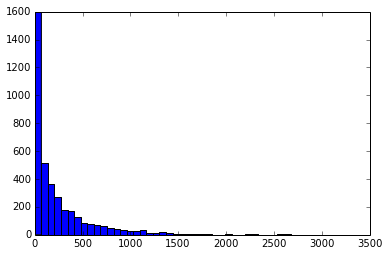

In [6]:
hist([msv[0] for msk, msv in stats.movie_stats.items()], bins=50) # counts

(array([  39.,   63.,  198.,  325.,  537.,  864.,  888.,  627.,  151.,   14.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

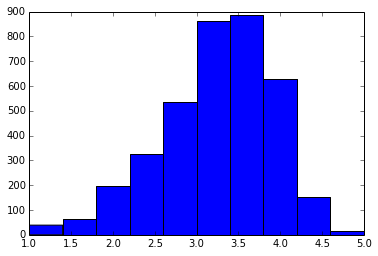

In [9]:
import math

hist([msv[1] for msk, msv in stats.movie_stats.items() if not math.isnan(msv[1])]) # arith mean

(array([ 107.,  249.,  462.,  557.,  683.,  771.,  578.,  259.,   27.,   13.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

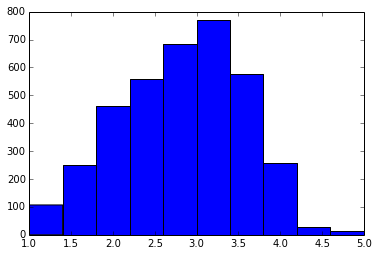

In [10]:
hist([msv[2] for msk, msv in stats.movie_stats.items() if not math.isnan(msv[1])]) # harm mean

(array([  2.25000000e+02,   7.16000000e+02,   1.92100000e+03,
          6.66000000e+02,   1.14000000e+02,   4.50000000e+01,
          1.30000000e+01,   3.00000000e+00,   2.00000000e+00,
          1.00000000e+00]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

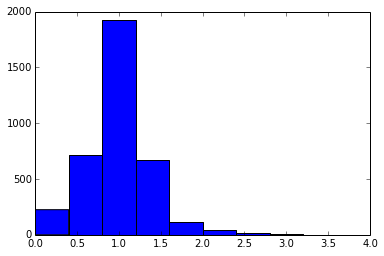

In [11]:
hist([msv[3] for msk, msv in stats.movie_stats.items() if not math.isnan(msv[1])]) # variance

(array([  2.29800000e+03,   1.06300000e+03,   6.88000000e+02,
          4.42000000e+02,   3.24000000e+02,   2.33000000e+02,
          2.17000000e+02,   1.29000000e+02,   1.32000000e+02,
          8.00000000e+01,   8.40000000e+01,   6.50000000e+01,
          4.40000000e+01,   3.70000000e+01,   3.40000000e+01,
          3.20000000e+01,   2.60000000e+01,   2.30000000e+01,
          2.30000000e+01,   1.20000000e+01,   1.10000000e+01,
          1.10000000e+01,   3.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   8.00000000e+00,
          5.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

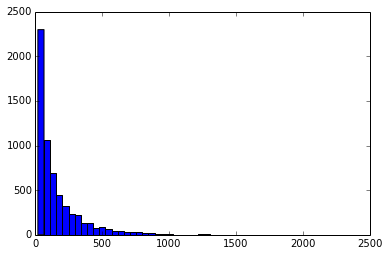

In [12]:
hist([usv[0] for usk, usv in stats.user_stats.items()], bins=50) # counts

(array([    3.,     0.,    15.,    62.,   275.,   907.,  2026.,  2019.,
          675.,    58.]),
 array([ 1.01538462,  1.41014245,  1.80490028,  2.19965812,  2.59441595,
         2.98917379,  3.38393162,  3.77868946,  4.17344729,  4.56820513,
         4.96296296]),
 <a list of 10 Patch objects>)

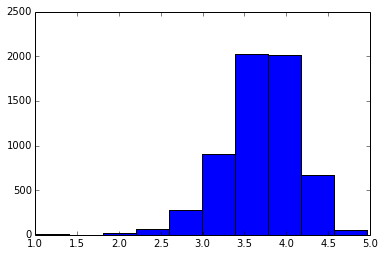

In [13]:
hist([usv[1] for usk, usv in stats.user_stats.items() if not math.isnan(usv[1])]) # arith mean

(array([    8.,    48.,   166.,   471.,   997.,  1587.,  1665.,   847.,
          227.,    24.]),
 array([ 1.00775194,  1.40238959,  1.79702724,  2.19166489,  2.58630254,
         2.98094019,  3.37557784,  3.77021549,  4.16485314,  4.55949079,
         4.95412844]),
 <a list of 10 Patch objects>)

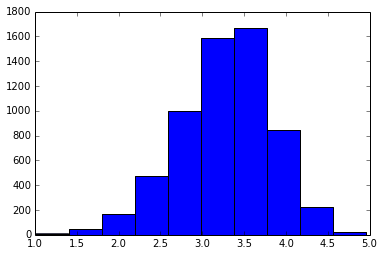

In [15]:
hist([usv[2] for usk, usv in stats.user_stats.items() if not math.isnan(usv[1])]) # harm mean

(array([   71.,  1117.,  2137.,  1562.,   698.,   300.,    99.,    40.,
           12.,     4.]),
 array([ 0.01514793,  0.35422492,  0.69330191,  1.0323789 ,  1.37145589,
         1.71053288,  2.04960988,  2.38868687,  2.72776386,  3.06684085,
         3.40591784]),
 <a list of 10 Patch objects>)

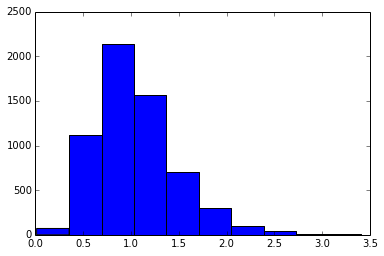

In [16]:
hist([usv[3] for usk, usv in stats.user_stats.items() if not math.isnan(usv[1])]) # variance

In [17]:
[len(stats.ratings.for_user(i)) for i in xrange(1,100)]

[53,
 129,
 51,
 21,
 198,
 71,
 31,
 139,
 106,
 401,
 137,
 23,
 108,
 25,
 201,
 35,
 211,
 305,
 255,
 24,
 22,
 297,
 304,
 136,
 85,
 400,
 70,
 107,
 108,
 43,
 119,
 48,
 391,
 164,
 198,
 351,
 53,
 100,
 62,
 96,
 25,
 231,
 24,
 193,
 297,
 41,
 22,
 598,
 108,
 43,
 40,
 79,
 684,
 40,
 25,
 67,
 64,
 437,
 213,
 70,
 36,
 498,
 98,
 27,
 121,
 26,
 64,
 72,
 65,
 54,
 29,
 43,
 255,
 43,
 175,
 87,
 39,
 140,
 31,
 48,
 86,
 118,
 99,
 31,
 39,
 48,
 59,
 68,
 21,
 225,
 44,
 430,
 220,
 21,
 99,
 81,
 154,
 20,
 107]

In [19]:
stats.ratings.for_user(2)

[2::1357::5::978298709,
 2::3068::4::978299000,
 2::1537::4::978299620,
 2::647::3::978299351,
 2::2194::4::978299297,
 2::648::4::978299913,
 2::2268::5::978299297,
 2::2628::3::978300051,
 2::1103::3::978298905,
 2::2916::3::978299809,
 2::3468::5::978298542,
 2::1210::4::978298151,
 2::1792::3::978299941,
 2::1687::3::978300174,
 2::1213::2::978298458,
 2::3578::5::978298958,
 2::2881::3::978300002,
 2::3030::4::978298434,
 2::1217::3::978298151,
 2::3105::4::978298673,
 2::434::2::978300174,
 2::2126::3::978300123,
 2::3107::2::978300002,
 2::3108::3::978299712,
 2::3035::4::978298625,
 2::1253::3::978299120,
 2::1610::5::978299809,
 2::292::3::978300123,
 2::2236::5::978299220,
 2::3071::4::978299120,
 2::902::2::978298905,
 2::368::4::978300002,
 2::1259::5::978298841,
 2::3147::5::978298652,
 2::1544::4::978300174,
 2::1293::5::978298261,
 2::1188::4::978299620,
 2::3255::4::978299321,
 2::3256::2::978299839,
 2::3257::3::978300073,
 2::110::5::978298625,
 2::2278::3::978299889,

In [20]:
stats.movie_stats[3893]

(559, 3.5026833631484795, 3.0672153635116599, 0.9619784882920881)

In [22]:
stats.movies[3893]

3893::Nurse Betty::2000::Comedy|Thriller